In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use("science.mplstyle")


In [10]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory

First get the best AUC data

In [19]:
# Load in the data

constit_num = 50


dim = 48
seeds_list = [1,2,3,4,5]

exp_id_S_nums = [0, 5, 50, 500, 2000, 5000, 10000, 20000, 30000, 50000]
exp_id_codes = ["0", "0p005", "0p05", "0p5", "02", "05", "10", "20", "30", "50"] 



lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}

lct_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
nn_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
trans_BC_best_auc_dict = {dim:0}
lct_const_rep_best_auc_dict = {dim:0}
nn_const_rep_best_auc_dict = {dim:0}

             
for seed in seeds_list:
    

    exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)


    expt_dir_trans_BC =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/" + exp_id_t + "/"
    expt_dir_CR =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/const_rep_seed_"+str(seed)+"/"

    # Constituent reps
    #"""
    
    local_tpr = np.load( expt_dir_CR+"const_rep_lct_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_lct_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= lct_const_rep_best_auc_dict[dim]:
        lct_const_rep_best_auc_dict[dim] = local_auc
        lct_const_rep_tpr_dict[dim] = local_tpr
        lct_const_rep_fpr_dict[dim] = local_fpr

    local_tpr = np.load( expt_dir_CR+"const_rep_nn_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_nn_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= nn_const_rep_best_auc_dict[dim]:
        nn_const_rep_best_auc_dict[dim] = local_auc
        nn_const_rep_tpr_dict[dim] = local_tpr
        nn_const_rep_fpr_dict[dim] = local_fpr

    #"""
    

    # Transformer BC 
    #"""
    
    local_tpr = np.load( expt_dir_trans_BC+"trans_BC_tpr_"+str(constit_num)+".npy" )
    local_fpr = np.load( expt_dir_trans_BC+"trans_BC_fpr_"+str(constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)


    if local_auc >= trans_BC_best_auc_dict[dim]:

        trans_BC_best_auc_dict[dim] = local_auc
        trans_BC_tpr_dict[dim] = local_tpr
        trans_BC_fpr_dict[dim] = local_fpr
    #"""


for code in exp_id_codes:
    
    
                    
    for seed in seeds_list:

        exp_id = code+"kS_50kB_"+"dim_"+str(dim)+"_seed_"+str(seed)
        exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)

        print(exp_id)

        expt_dir = base_dir + "projects/rep_learning/experiments/SB_ratios_22_04_10/" + exp_id + "/"

        #"""
        # CLR trained LCT
        for i in range(3):
            
            local_tpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)

            if local_auc >= lct_best_auc_dict[i][code]:
                lct_best_auc_dict[i][code] = local_auc
                lct_tpr_dict[i][code] = local_tpr
                lct_fpr_dict[i][code] = local_fpr


        # CLR trained NN
        
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_NN"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_NN"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)
            

            if local_auc >= nn_best_auc_dict[i][code]:
                nn_best_auc_dict[i][code] = local_auc
                nn_tpr_dict[i][code] = local_tpr
                nn_fpr_dict[i][code] = local_fpr



0kS_50kB_dim_48_seed_1
0kS_50kB_dim_48_seed_2
0kS_50kB_dim_48_seed_3
0kS_50kB_dim_48_seed_4
0kS_50kB_dim_48_seed_5
0p005kS_50kB_dim_48_seed_1
0p005kS_50kB_dim_48_seed_2
0p005kS_50kB_dim_48_seed_3
0p005kS_50kB_dim_48_seed_4
0p005kS_50kB_dim_48_seed_5
0p05kS_50kB_dim_48_seed_1
0p05kS_50kB_dim_48_seed_2
0p05kS_50kB_dim_48_seed_3
0p05kS_50kB_dim_48_seed_4
0p05kS_50kB_dim_48_seed_5
0p5kS_50kB_dim_48_seed_1
0p5kS_50kB_dim_48_seed_2
0p5kS_50kB_dim_48_seed_3
0p5kS_50kB_dim_48_seed_4
0p5kS_50kB_dim_48_seed_5
02kS_50kB_dim_48_seed_1
02kS_50kB_dim_48_seed_2
02kS_50kB_dim_48_seed_3
02kS_50kB_dim_48_seed_4
02kS_50kB_dim_48_seed_5
05kS_50kB_dim_48_seed_1
05kS_50kB_dim_48_seed_2
05kS_50kB_dim_48_seed_3
05kS_50kB_dim_48_seed_4
05kS_50kB_dim_48_seed_5
10kS_50kB_dim_48_seed_1
10kS_50kB_dim_48_seed_2
10kS_50kB_dim_48_seed_3
10kS_50kB_dim_48_seed_4
10kS_50kB_dim_48_seed_5
20kS_50kB_dim_48_seed_1
20kS_50kB_dim_48_seed_2
20kS_50kB_dim_48_seed_3
20kS_50kB_dim_48_seed_4
20kS_50kB_dim_48_seed_5
30kS_50kB_dim_4

In [20]:
# Load in the data


exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]


lct_auc_dict = {0:[],1:[],2:[]}
nn_auc_dict = {0:[],1:[],2:[]}
lct_maxsic_dict = {0:[],1:[],2:[]}
nn_maxsic_dict = {0:[],1:[],2:[]}
trans_BC_auc = []
trans_BC_maxsic = []
nn_const_rep_auc = []
nn_const_rep_maxsic = []

fixed_TPR = 0.5

lct_FPRatTPR_dict = {0:[],1:[],2:[]}
nn_FPRatTPR_dict = {0:[],1:[],2:[]}
trans_BC_FPRatTPR = []
nn_const_rep_FPRatTPR = []


for code in exp_id_codes:
    
    exp_id = code
   
    # Transformer BC 
    
    trans_BC_auc.append(metrics.auc(trans_BC_fpr_dict[dim], trans_BC_tpr_dict[dim]))

    SIC = trans_BC_tpr_dict[dim]/np.sqrt(trans_BC_fpr_dict[dim])
    finite_SIC = SIC[np.isfinite(SIC)]
    trans_BC_maxsic.append(np.max(finite_SIC))

    dist_from_fixed_tpr = np.abs(trans_BC_tpr_dict[dim] - fixed_TPR)
    min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
    trans_BC_FPRatTPR.append(trans_BC_fpr_dict[dim][min_dist_ind])
    
    # NN Const Rep
    
    nn_const_rep_auc.append(metrics.auc(nn_const_rep_fpr_dict[dim], nn_const_rep_tpr_dict[dim]))

    SIC = nn_const_rep_tpr_dict[dim]/np.sqrt(nn_const_rep_fpr_dict[dim])
    finite_SIC = SIC[np.isfinite(SIC)]
    nn_const_rep_maxsic.append(np.max(finite_SIC))

    dist_from_fixed_tpr = np.abs(nn_const_rep_tpr_dict[dim] - fixed_TPR)
    min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
    nn_const_rep_FPRatTPR.append(nn_const_rep_fpr_dict[dim][min_dist_ind])
    
    
    for i in range(3):
    
        # CLR trained LCT
        
        lct_auc_dict[i].append(metrics.auc(lct_fpr_dict[i][exp_id], lct_tpr_dict[i][exp_id]))

        SIC = lct_tpr_dict[i][exp_id]/np.sqrt(lct_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        lct_maxsic_dict[i].append(np.max(finite_SIC))

        dist_from_fixed_tpr = np.abs(lct_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        lct_FPRatTPR_dict[i].append(lct_fpr_dict[i][exp_id][min_dist_ind])

    
        # CLR trained NN
        nn_auc_dict[i].append(metrics.auc(nn_fpr_dict[i][exp_id], nn_tpr_dict[i][exp_id]))

        SIC = nn_tpr_dict[i][exp_id]/np.sqrt(nn_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        nn_maxsic_dict[i].append(np.max(finite_SIC))
        
        dist_from_fixed_tpr = np.abs(nn_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        nn_FPRatTPR_dict[i].append(nn_fpr_dict[i][exp_id][min_dist_ind])
    
    
    
    
    

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib6

# Individual Plots

## TPR / FPR

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/l

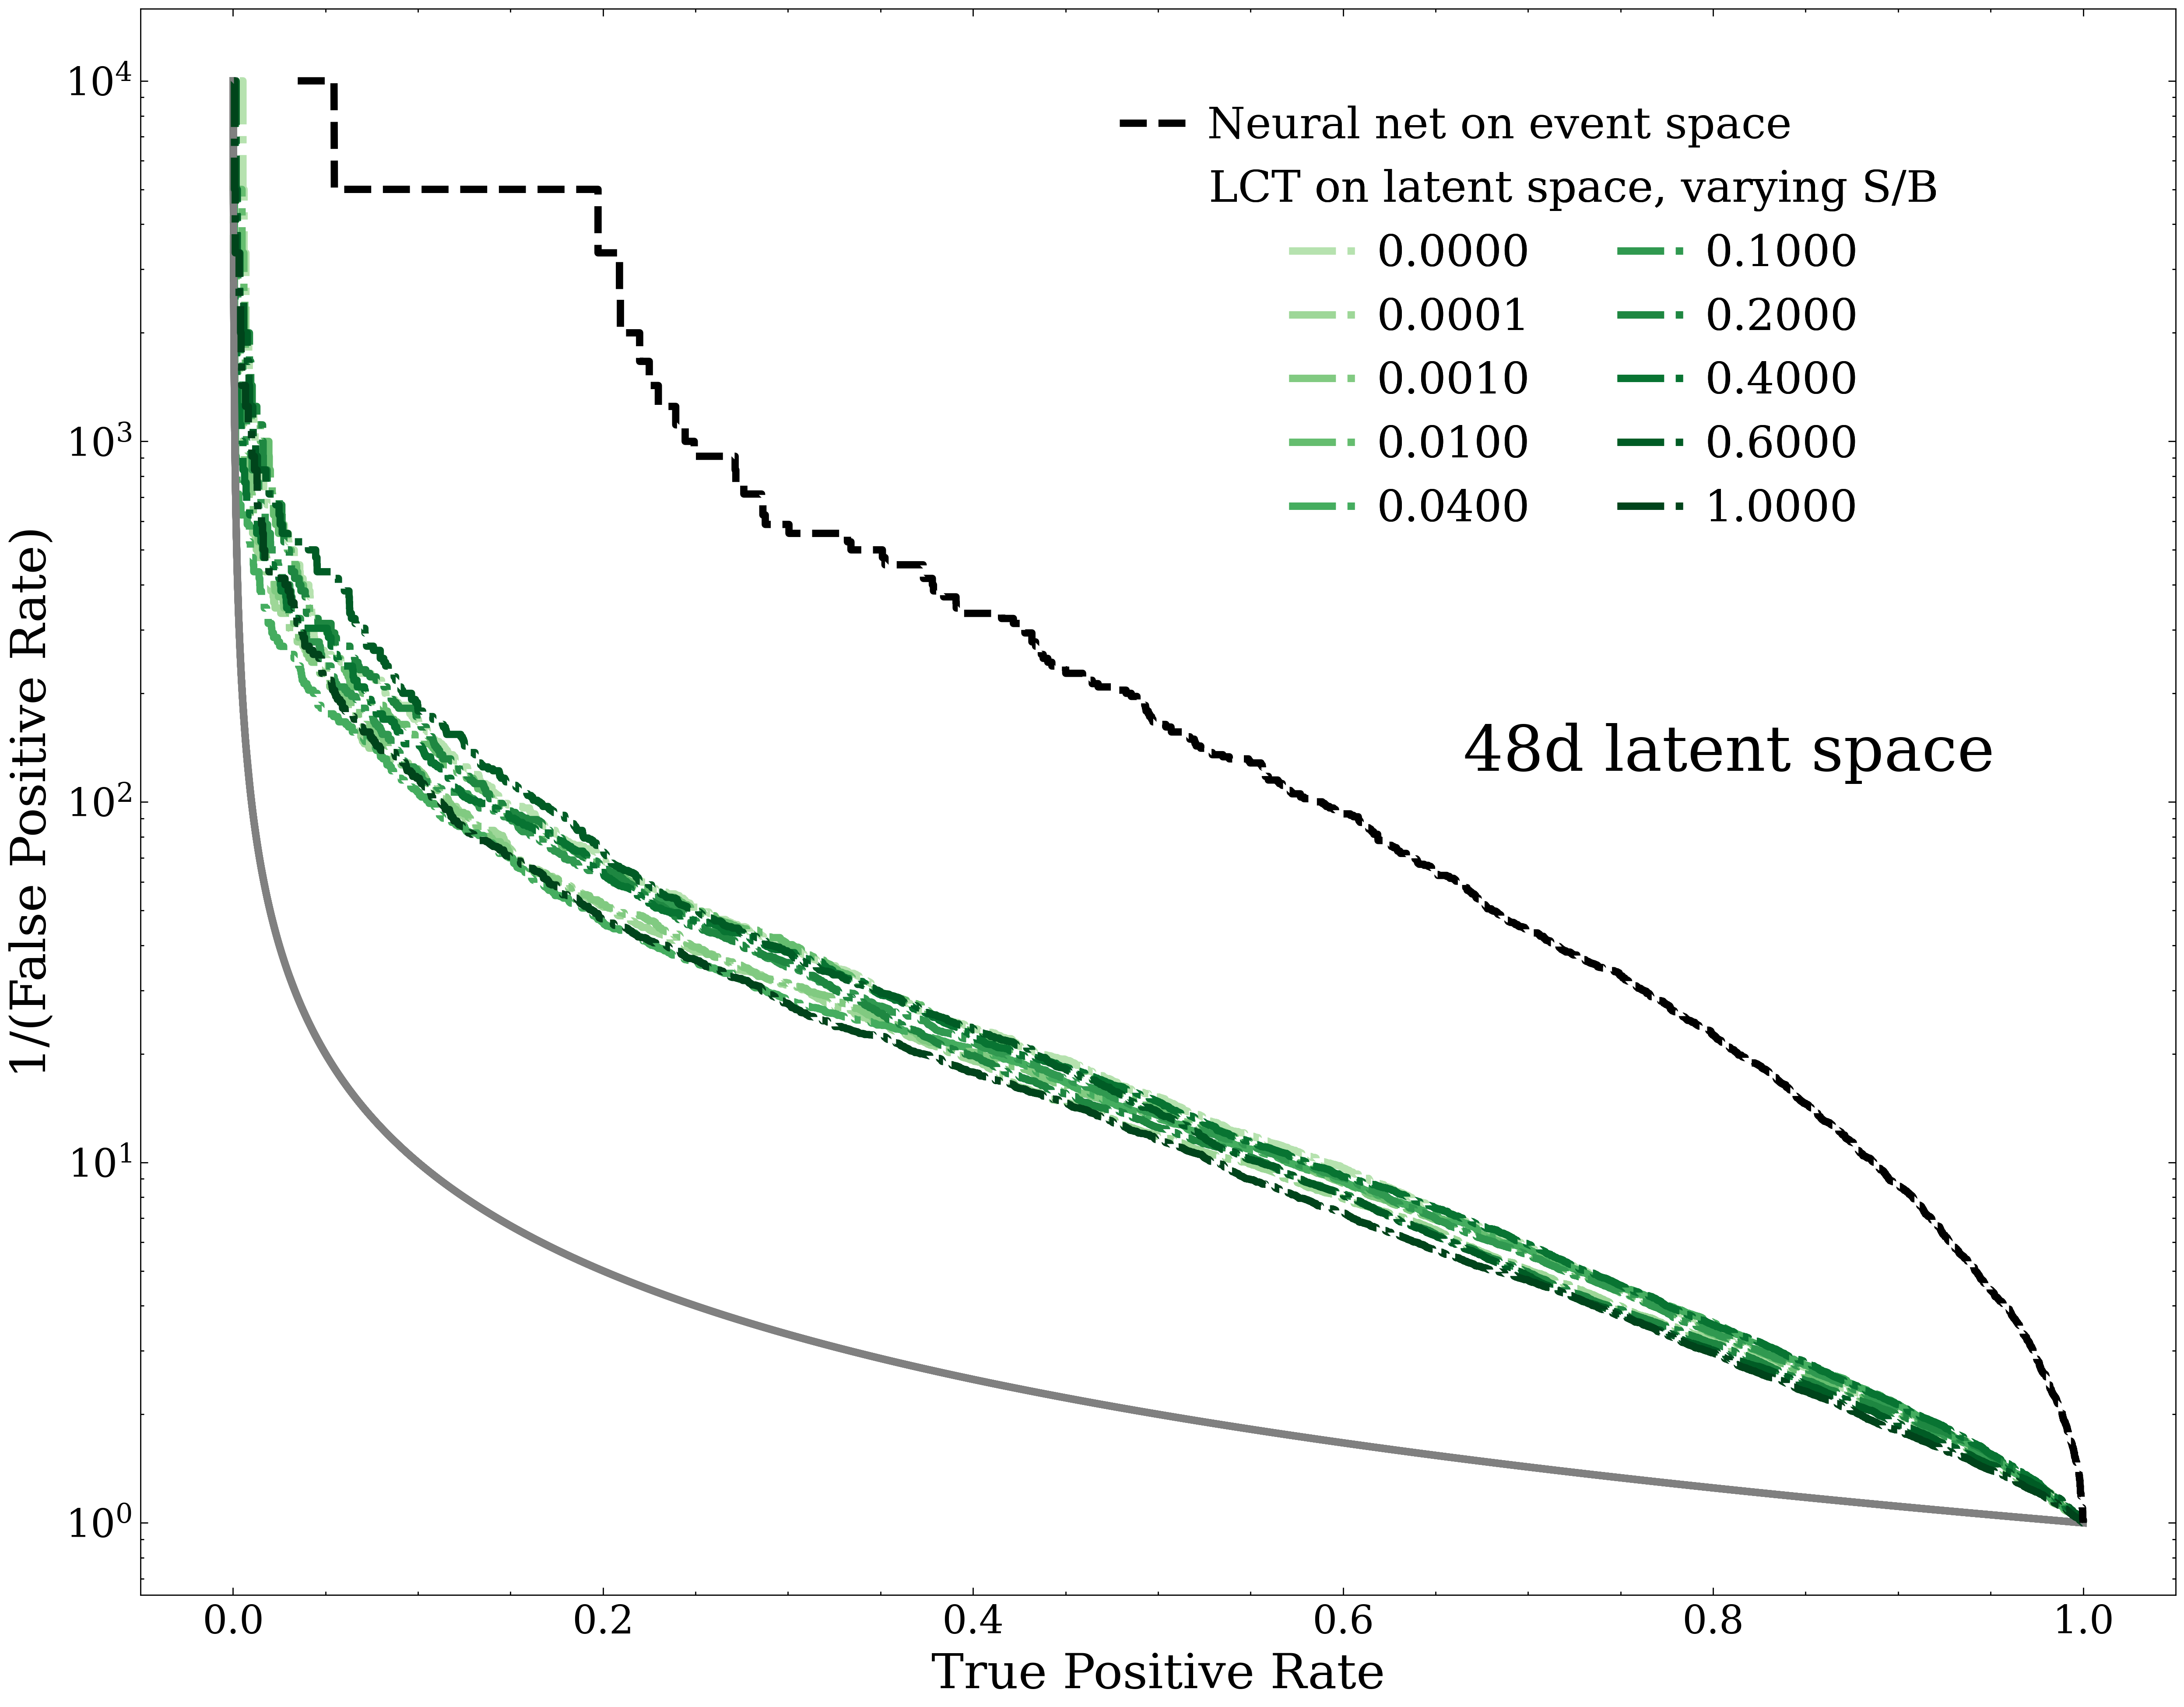

In [21]:
fig = plt.figure(figsize = (15,12))


l = 3
layer = 1
layer_id_dict = {0:"transformer layer", 1:"hidden layer", 2:"output layer"}
#exp_id_dict = {"0":"0.000", "0p05":"0.001", "0p1":"0.002", "0p5":"0.010", "01":"0.020","05":"0.100", "10":"0.200","25":"0.500", "50":"1.000"} 
exp_id_dict = {"0":"0.0000", "0p005":"0.0001", "0p05":"0.0010", "0p5":"0.0100", "02":"0.0400","05":"0.1000", "10":"0.2000","20":"0.4000","30":"0.6000", "50":"1.0000"} 



title_fontsize = 18

gap = 4

from matplotlib.pyplot import cm
color = iter(cm.Greens(np.linspace(0, 1, 10+gap)))
for i in range(gap):
    c = next(color)
ax = plt.gca()


for i, exp_id in enumerate(exp_id_codes): 
    
    c = next(color)

    # ALL DIMS
    #"""
    # random
    plt.plot(lct_tpr_dict[2][exp_id],1.0/lct_tpr_dict[2][exp_id], color = "grey", linewidth = l)

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT on const. rep", color = "black", linestyle = "dotted",  linewidth = l)
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN on const. rep", color = "black", linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[layer][exp_id], 1.0/lct_fpr_dict[layer][exp_id], label = exp_id_dict[exp_id], color = c, linestyle = "dashdot",  linewidth = l)
    #plt.plot(nn_tpr_dict[layer][exp_id], 1.0/nn_fpr_dict[layer][exp_id], label = exp_id_dict[exp_id], color = c, linestyle = "solid",  linewidth = l)
    #"""
    
    # ONE DIM
    """
    plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[0], linestyle = "dotted",  linewidth = l)
    plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[1], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[2], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[3], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[4], linestyle = "dashdot",  linewidth = l)
    """
    
plt.plot(nn_const_rep_tpr_dict[dim], 1.0/nn_const_rep_fpr_dict[dim], label = "Neural net on event space", color = "black", linestyle = "dashed" , linewidth = l)

#plt.plot(trans_BC_tpr_dict[dim], 1.0/trans_BC_fpr_dict[dim], label = "S/B = 1", color = "k", linestyle = "dashdot",  linewidth = l)
plt.text(0.65, 0.55, str(dim)+"d latent space", transform=ax.transAxes, fontsize=26,
        verticalalignment="top")
    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")

# legend fun
handles, labels = plt.gca().get_legend_handles_labels()
handles_sb = handles[:-1]
labels_sb = labels[:-1]


plt.rcParams['legend.title_fontsize'] = title_fontsize


leg2 = plt.legend(handles=handles[-1:], 
           labels=labels[-1:], bbox_to_anchor=(.82, 0.95),  
                   ncol=1, handlelength=1.6, handletextpad=0.4,  
                   loc="upper right", frameon=False, borderaxespad=0, fontsize = title_fontsize)

leg1 = plt.legend(handles=handles_sb, labels=labels_sb, 
                  #title="Neural net on latent space, varying S/B", bbox_to_anchor=(0.964, 0.91), 
                  title="LCT on latent space, varying S/B", bbox_to_anchor=(0.892, 0.91), 
                  ncol=2
                  , handlelength=1.6, handletextpad=0.4, loc="upper right",
                  frameon=False, borderaxespad=0, fontsize = title_fontsize)
ax.add_artist(leg1)
ax.add_artist(leg2)



plt.show()


img_name = "figures/SvB_48_LCT.pdf"
pp = PdfPages(img_name)
pp.savefig(fig)
pp.close()




## SIC

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/p

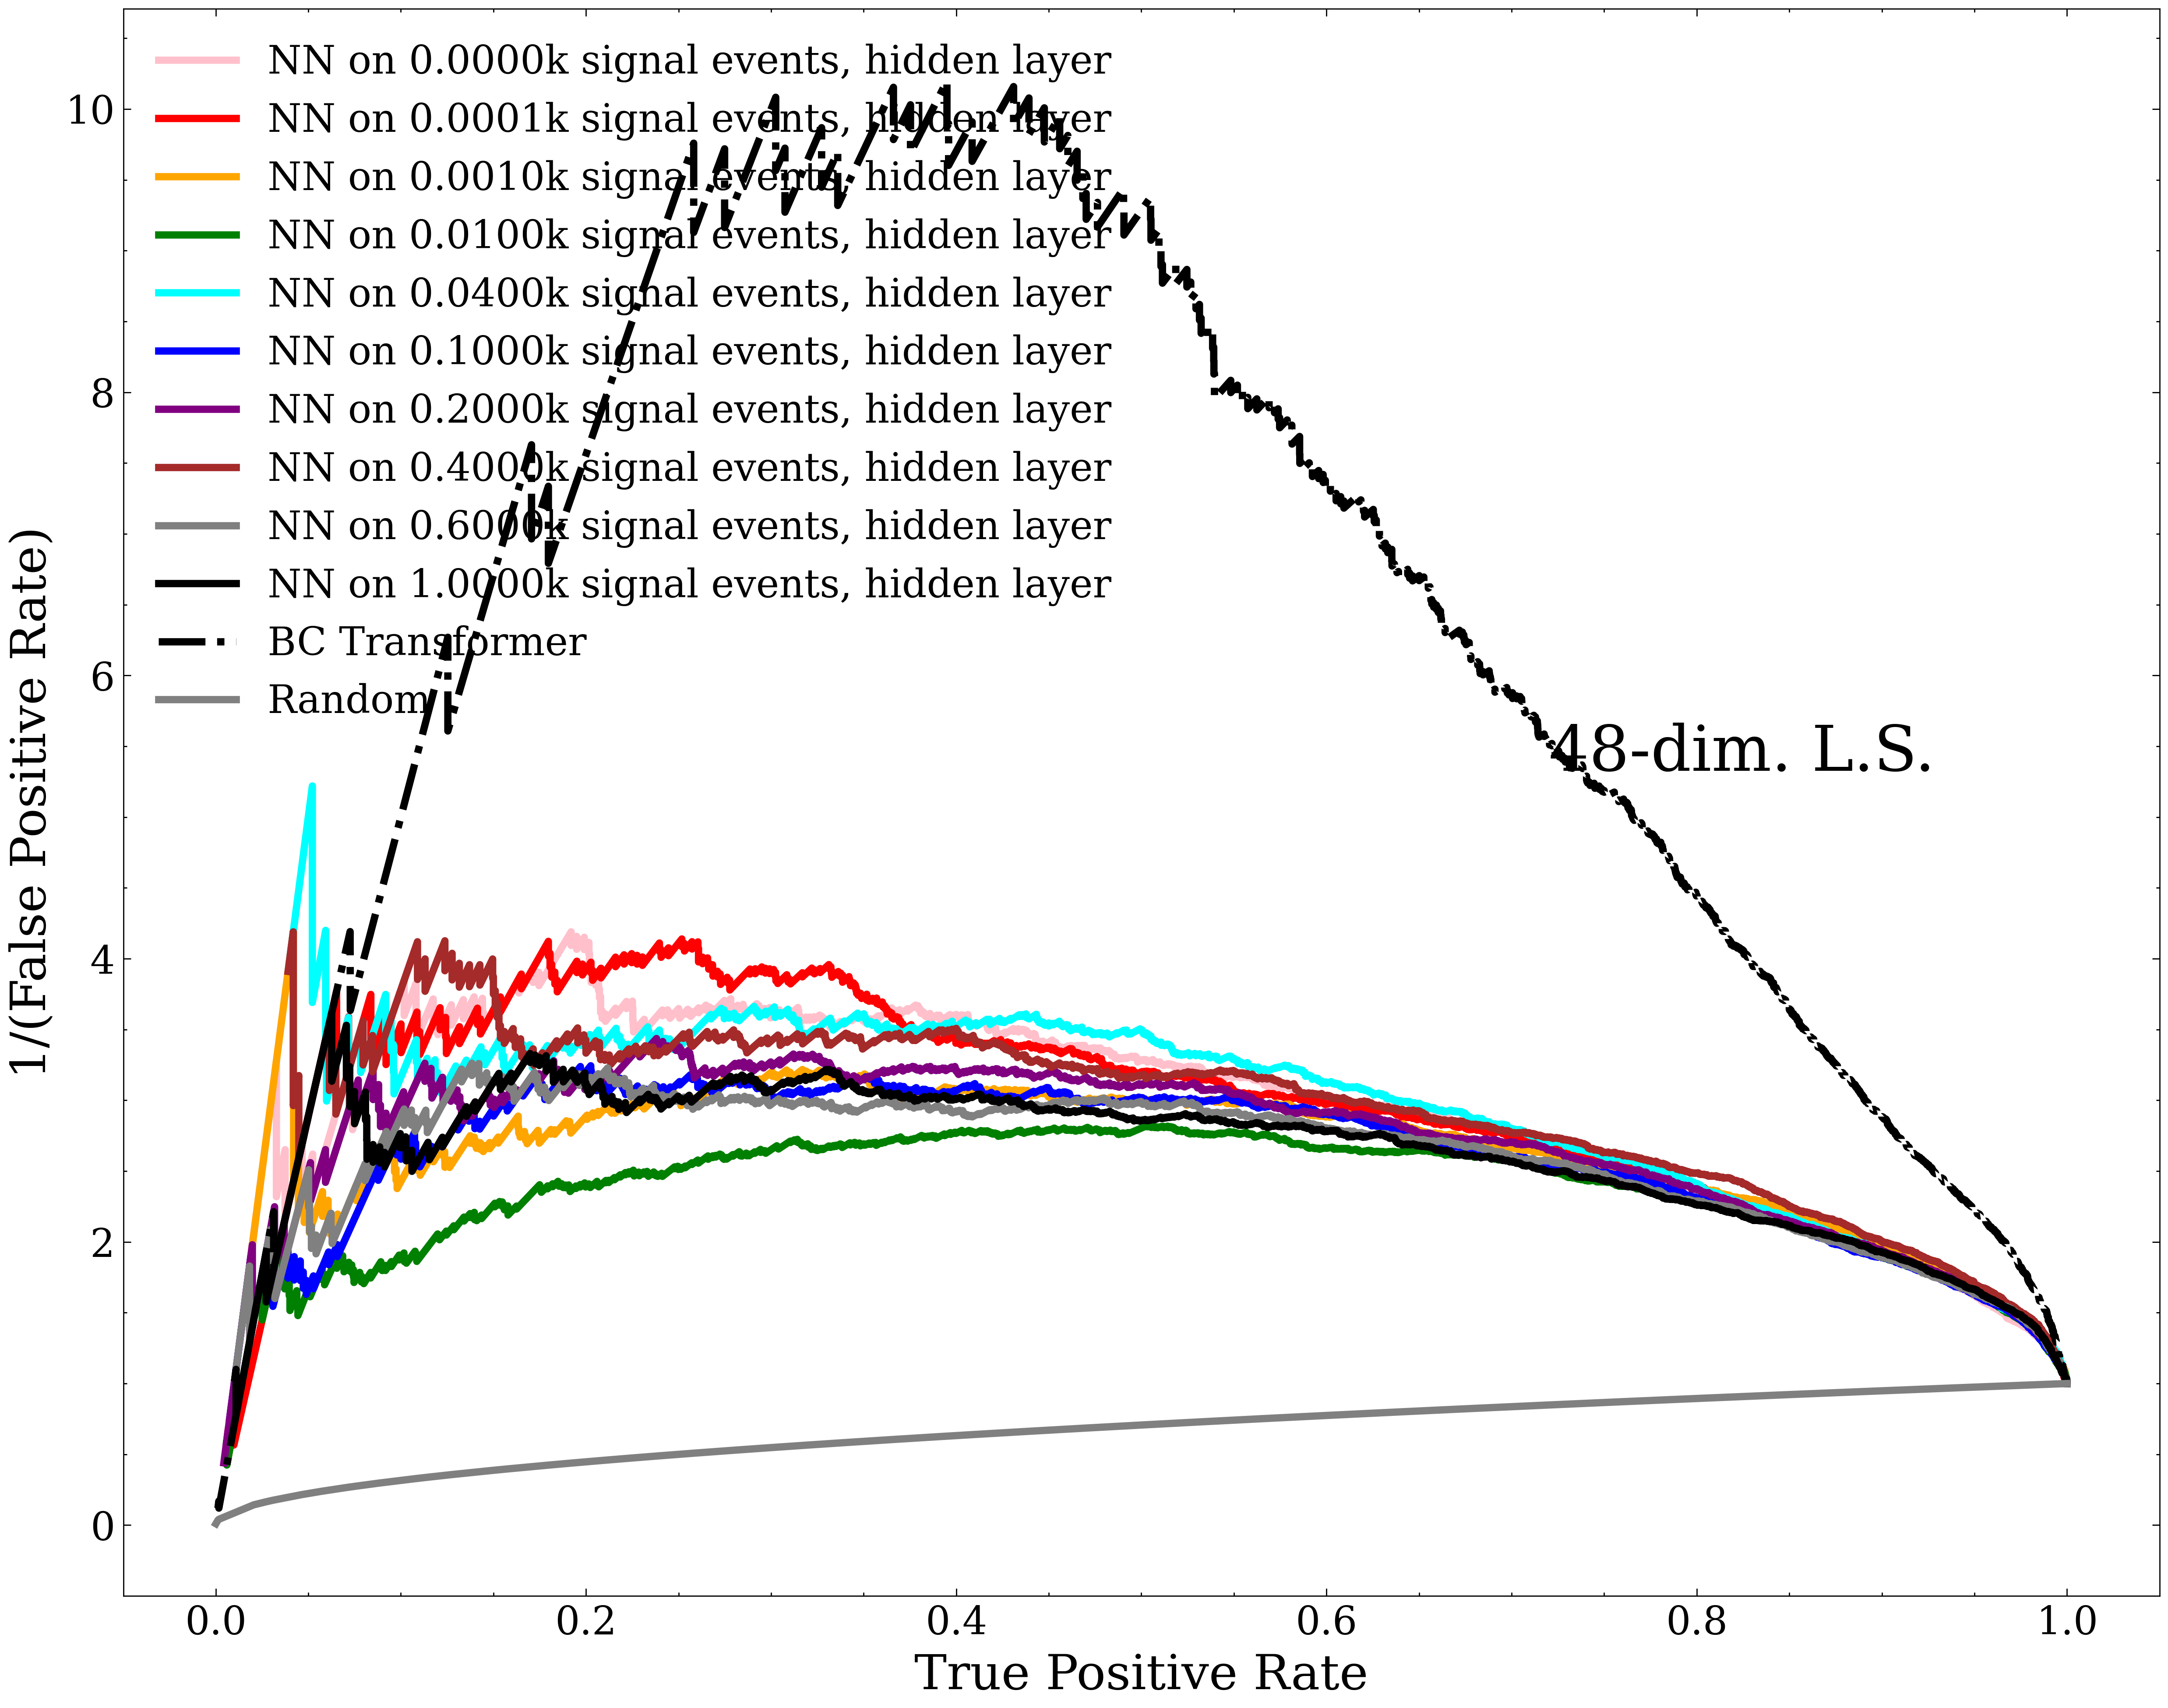

In [22]:
fig = plt.figure(figsize = (15,12))

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

with np.errstate(divide='ignore'):

    for i, exp_id in enumerate(exp_id_codes): 

        # ALL DIMS
        #"""
        # random
        
        #plt.plot(nn_tpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
        plt.plot(nn_tpr_dict[layer][exp_id], nn_tpr_dict[layer][exp_id]/np.sqrt(nn_fpr_dict[layer][exp_id]), label = "NN on "+exp_id_dict[exp_id]+"k signal events, "+str(layer_id_dict[layer]), color = colors[i], linestyle = "solid",  linewidth = l)
        #plt.plot(lct_tpr_dict[layer2][exp_id], lct_tpr_dict[layer][exp_id]/np.sqrt(lct_fpr_dict[layer][exp_id]), label = "LCT on "+str(dim)+"k signal events, "+str(layer_id_dict[layer]), color = colors[i], linestyle = (0,(1,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[dim], trans_BC_tpr_dict[dim]/np.sqrt(trans_BC_fpr_dict[dim]), label = "BC Transformer", color = "k", linestyle = "dashdot",  linewidth = l)
    plt.plot(trans_BC_tpr_dict[dim], trans_BC_tpr_dict[dim]/np.sqrt(trans_BC_tpr_dict[dim]), label = "Random", color = "grey",   linewidth = l)

    
        #"""

ax = plt.gca()
plt.text(0.7, 0.55, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=26,
        verticalalignment="top")
    
#plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



# Summary plots

## Final AUC

In [ ]:
# Load in the data
#exp_id_S_nums = [0, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
#exp_id_codes = ["0", "0p05", "0p1", "0p5", "01","05", "10","25", "50"] 
linthresh = 0.1



colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3
#"""
plt.plot(exp_id_SB_ratios, lct_auc_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_auc_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[2], label = "NN, output layer", color = "green", linewidth = l)
#"""
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_const_rep_auc, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("AUC")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## max SIC

In [ ]:
# Load in the data



fig = plt.figure(figsize = (10,8))

l = 3

"""
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[2], label = "NN, output layer", color = "green", linewidth = l)
"""

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_const_rep_maxsic, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("max(SIC)")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")

plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## FPR at SPR

In [ ]:
# Load in the data



from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3
"""
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[2], label = "NN, output layer", color = "green", linewidth = l)
"""

plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")


plt.plot(exp_id_SB_ratios, nn_const_rep_FPRatTPR, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("FPR @ TPR = 0.5")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")

plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()

